In [33]:
import numpy as np

import sys # needed to import cat_utils
sys.path.insert(0, '/home/abrahamn/21cmIRxcor/')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import imp
import cat_utils
imp.reload(cat_utils)

import cPickle as pickle

In [53]:
logjycuts_ir_wise = [-5,-4,-3,-2,-1]
logjycuts_ir_atlas = [-4,-3,-2,-1]
logjycuts_rad = [-1,-.5,0,.5,1]

def list2pairs(l):
    return [[l[j],l[j+1]] for j in range(len(l)-1)]

print(list2pairs(logjycuts_rad))

[[-1, -0.5], [-0.5, 0], [0, 0.5], [0.5, 1]]


In [54]:
#d = '/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/'
d = '/home/abrahamn/xcor_data/ir_catalogs/'

w2_img_diff_flux_cuts_img_and_counts = [pickle.load(open(d+'w2_logjymin=%d_logjymax=%d.p'%(logjyminmax[0],logjyminmax[1]),'rb')) for logjyminmax in list2pairs(logjycuts_ir_wise)]
w2_img_diff_flux_cuts = [l[0] for l in w2_img_diff_flux_cuts_img_and_counts]
w2_img_diff_flux_cuts_counts = [l[1] for l in w2_img_diff_flux_cuts_img_and_counts]

secat_img_diff_flux_cuts_img_and_counts = [pickle.load(open(d+'secat_logjymin=%d_logjymax=%d.p'%(logjyminmax[0],logjyminmax[1]),'rb')) for logjyminmax in list2pairs(logjycuts_ir_atlas)]
secat_img_diff_flux_cuts = [l[0] for l in secat_img_diff_flux_cuts_img_and_counts]
secat_img_diff_flux_cuts_counts = [l[1] for l in secat_img_diff_flux_cuts_img_and_counts]

mwa_img_bound_by_wise_diff_flux_cuts_img_and_counts = [pickle.load(open(d+'mwacat_bounded_by_wise_logjymin=%1.1f_logjymax=%1.1f.p'%(logjyminmax[0],logjyminmax[1]),'rb')) for logjyminmax in list2pairs(logjycuts_rad)]
mwa_img_bound_by_wise_diff_flux_cuts = [l[0] for l in mwa_img_bound_by_wise_diff_flux_cuts_img_and_counts]
mwa_img_bound_by_wise_diff_flux_cuts_counts = [l[1] for l in mwa_img_bound_by_wise_diff_flux_cuts_img_and_counts]

mwa_img_bound_by_secatfov_diff_flux_cuts_img_and_counts = [pickle.load(open(d+'mwacat_bounded_by_secatfov_logjymin=%1.1f_logjymax=%1.1f.p'%(logjyminmax[0],logjyminmax[1]),'rb')) for logjyminmax in list2pairs(logjycuts_rad)]
mwa_img_bound_by_secatfov_diff_flux_cuts = [l[0] for l in mwa_img_bound_by_secatfov_diff_flux_cuts_img_and_counts]
mwa_img_bound_by_secatfov_diff_flux_cuts_counts = [l[1] for l in mwa_img_bound_by_secatfov_diff_flux_cuts_img_and_counts]

In [76]:
mwa_img_bound_by_wise_diff_flux_cuts[0].shape

(214, 214)

In [77]:
mwa_img_bound_by_secatfov_diff_flux_cuts[0].shape

(179, 179)

In [55]:
def sum_images_in_list_between_indices(imglist,i0,i1):
    return np.sum(np.array(imglist[i0:i1]),axis=0)

In [56]:
mwaimg = sum_images_in_list_between_indices(mwa_img_bound_by_wise_diff_flux_cuts,0,2)
mwaimg -= mwaimg.mean()

wiseimg = sum_images_in_list_between_indices(w2_img_diff_flux_cuts,0,2)
wiseimg  -= wiseimg.mean()

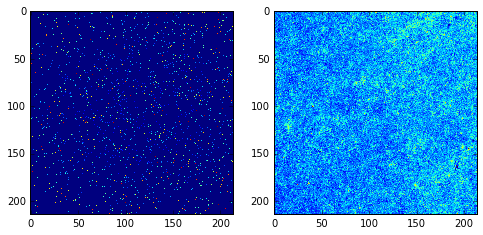

In [57]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(mwaimg,interpolation='nearest')
plt.subplot(122)
plt.imshow(wiseimg,interpolation='nearest')

In [58]:
c = np.mean(mwaimg*wiseimg)/(np.std(mwaimg)*np.std(wiseimg))
c_flip = np.mean(np.flipud(np.fliplr(mwaimg))*wiseimg)/(np.std(mwaimg)*np.std(wiseimg))

(c,c_flip)

(0.024102704170955933, -0.0057434918329211365)

In [94]:
def flip(m):
    return np.flipud(m)

n_fluxcuts_mwa = len(logjycuts_rad)-1
n_fluxcuts_ir_wise = len(logjycuts_ir_wise)-1
n_fluxcuts_ir_atlas = len(logjycuts_ir_atlas)-1

c_grid_mwa_wise = np.zeros((n_fluxcuts_mwa,n_fluxcuts_ir_wise))
c_grid_mwa_secat = np.zeros((n_fluxcuts_mwa,n_fluxcuts_ir_atlas))

c_grid_mwa_wise_flip = np.zeros((n_fluxcuts_mwa,n_fluxcuts_ir_wise))
c_grid_mwa_secat_flip = np.zeros((n_fluxcuts_mwa,n_fluxcuts_ir_atlas))

for mwai in range(n_fluxcuts_mwa):
    for iri in range(n_fluxcuts_ir_wise):
        
        mwaimg = sum_images_in_list_between_indices(mwa_img_bound_by_wise_diff_flux_cuts,0,mwai+1)
        mwaimg -= mwaimg.mean()
        irimg = sum_images_in_list_between_indices(w2_img_diff_flux_cuts,0,iri+1)
        irimg  -= wiseimg.mean()
        
        c_grid_mwa_wise[mwai,iri] = np.mean(mwaimg*irimg)/(np.std(mwaimg)*np.std(irimg))
        c_grid_mwa_wise_flip[mwai,iri] = np.mean(flip(mwaimg)*irimg)/(np.std(mwaimg)*np.std(irimg))
        
    for iri in range(n_fluxcuts_ir_atlas):
        
        mwaimg = sum_images_in_list_between_indices(mwa_img_bound_by_secatfov_diff_flux_cuts,0,mwai+1)
        mwaimg -= mwaimg.mean()
        irimg = sum_images_in_list_between_indices(secat_img_diff_flux_cuts,0,iri+1)
        irimg  -= wiseimg.mean()
        
        c_grid_mwa_secat[mwai,iri] = np.mean(mwaimg*irimg)/(np.std(mwaimg)*np.std(irimg))
        c_grid_mwa_secat_flip[mwai,iri] = np.mean(flip(mwaimg)*irimg)/(np.std(mwaimg)*np.std(irimg))

In [95]:
-2.5*np.log10(1.e-3/3631)

16.400065622282231

In [101]:
c_grid_mwa_wise*100

array([[ 2.86571699,  2.61312961,  0.29253985,  0.27617256],
       [ 3.32840832,  2.41027042,  0.5116824 , -0.33306212],
       [ 2.42660912,  1.88798531,  0.09699245,  0.04961537],
       [ 2.00410701,  2.19527523,  0.92477091, -0.08074984]])

In [102]:
c_grid_mwa_secat*100

array([[ 1.67594901,  0.85568469,  0.23682536],
       [ 1.31351853,  0.65675664,  0.34655847],
       [ 0.60471465, -0.04000931, -0.65025892],
       [ 0.49070069,  0.80122259, -0.08237751]])

In [106]:
np.abs(c_grid_mwa_secat)/(1./179)

array([[ 2.99994873,  1.53167559,  0.4239174 ],
       [ 2.35119817,  1.17559439,  0.62033967],
       [ 1.08243922,  0.07161666,  1.16396346],
       [ 0.87835424,  1.43418843,  0.14745574]])

In [98]:
np.max(c_grid_mwa_wise),np.max(c_grid_mwa_secat)

(0.033284083238030678, 0.016759490113273535)

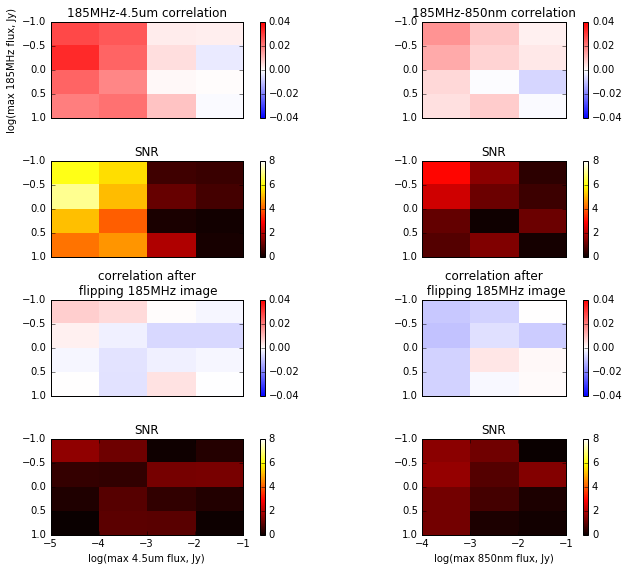

In [107]:
plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 10})
nrows,ncols = 4,2
cm = 'seismic'
v0,v1 = 0,.04
ewise = [min(logjycuts_ir_wise),max(logjycuts_ir_wise),max(logjycuts_rad),min(logjycuts_rad)]
eatlas = [min(logjycuts_ir_atlas),max(logjycuts_ir_atlas),max(logjycuts_rad),min(logjycuts_rad)]
cticks = [-.04,-.02,0,.02,.04]
snrticks = [0,2,4,6,8]

plt.subplot(nrows,ncols,1)
plt.imshow(c_grid_mwa_wise,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=ewise)
plt.colorbar(ticks=cticks)
plt.title('185MHz-4.5um correlation')
plt.ylabel('log(max 185MHz flux, Jy)')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,2)
plt.imshow(c_grid_mwa_secat,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=eatlas)
plt.colorbar(ticks=cticks)
plt.title('185MHz-850nm correlation')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,3)
plt.imshow(np.abs(c_grid_mwa_wise)/(1./214),interpolation='nearest',vmin=0,vmax=max(snrticks),cmap='hot',extent=ewise)
plt.colorbar(ticks=snrticks)
plt.title('SNR')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,4)
plt.imshow(np.abs(c_grid_mwa_secat)/(1./179),interpolation='nearest',vmin=0,vmax=max(snrticks),cmap='hot',extent=eatlas)
plt.colorbar(ticks=snrticks)
plt.title('SNR')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,5)
plt.imshow(c_grid_mwa_wise_flip,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=ewise)
plt.colorbar(ticks=cticks)
plt.title('correlation after\n flipping 185MHz image')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,6)
plt.imshow(c_grid_mwa_secat_flip,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=eatlas)
plt.colorbar(ticks=cticks)
plt.title('correlation after\n flipping 185MHz image')
plt.gca().set_xticks([])

plt.subplot(nrows,ncols,7)
plt.imshow(np.abs(c_grid_mwa_wise_flip)/(1./214),interpolation='nearest',vmin=0,vmax=max(snrticks),cmap='hot',extent=ewise)
plt.colorbar(ticks=snrticks)
plt.title('SNR')
plt.gca().set_xticks([-5,-4,-3,-2,-1])
plt.xlabel('log(max 4.5um flux, Jy)')

plt.subplot(nrows,ncols,8)
plt.imshow(np.abs(c_grid_mwa_secat_flip)/(1./179),interpolation='nearest',vmin=0,vmax=max(snrticks),cmap='hot',extent=eatlas)
plt.colorbar(ticks=snrticks)
plt.gca().set_xticks([-4,-3,-2,-1])
plt.title('SNR')
plt.xlabel('log(max 850nm flux, Jy)')

plt.tight_layout()

plt.savefig('source_correlation_grids_and_snrs.pdf',bbox_inches='tight')

In [100]:
np.abs(c_grid_mwa_secat_flip)/(1./200)

array([[ 1.74037258,  1.3938281 ,  0.00735736],
       [ 1.88236251,  0.99113373,  1.6081935 ],
       [ 1.42644178,  0.79313342,  0.24568347],
       [ 1.42605554,  0.24859584,  0.13235848]])

In [64]:
c_grid_mwa_wise[9,9],c_grid_mwa_secat[9,9]

IndexError: index 9 is out of bounds for axis 0 with size 4

In [ ]:
c_grid_mwa_wise[8,8],c_grid_mwa_secat[8,8]

In [ ]:
c_grid_mwa_wise_flip[8,8],c_grid_mwa_secat_flip[8,8]

In [15]:
1./200

0.005

In [14]:
# plt.figure(figsize=(20,10))
# inds = [2,4,6,8,10]
# for i in range(len(inds)):
#     img = sum_images_in_list_between_indices(mwa_img_bound_by_wise_diff_flux_cuts,0,inds[i])
#     plt.subplot(3,len(inds),i+1)
#     v0,v1 = -1,0
#     plt.imshow(np.log10(img),interpolation='nearest',vmin=v0,vmax=v1)
#     cbar=plt.colorbar(format='%d')
#     cbar.set_ticks(np.arange(v0,v1+1))
#     cbar.set_ticklabels(np.arange(v0,v1+1))
#     plt.axis('off')
#     plt.title('MWA 0- %')
    
# for i in range(len(inds)):
#     img = sum_images_in_list_between_indices(secat_img_diff_flux_cuts,0,inds[i])
#     plt.subplot(3,len(inds),len(inds)+i+1)
#     v0,v1 = -4,-1
#     plt.imshow(np.log10(img),interpolation='nearest',vmin=v0,vmax=v1)
#     cbar=plt.colorbar(format='%d')
#     cbar.set_ticks(np.arange(v0,v1+1))
#     cbar.set_ticklabels(np.arange(v0,v1+1))
#     plt.axis('off')
#     plt.title('')

# for i in range(len(inds)):
#     img = sum_images_in_list_between_indices(w2_img_diff_flux_cuts,0,inds[i])
#     plt.subplot(3,len(inds),2*len(inds)+i+1)
#     v0,v1 = -4,-1
#     plt.imshow(np.log10(img),interpolation='nearest',vmin=v0,vmax=v1)
#     cbar=plt.colorbar(format='%d')
#     cbar.set_ticks(np.arange(v0,v1+1))
#     cbar.set_ticklabels(np.arange(v0,v1+1))
#     plt.axis('off')
#     plt.title('test')

# what about in janskies? or magnitudes?
     
# #plt.tight_layout()
# plt.subplots_adjust(hspace = .1)
# plt.subplots_adjust(wspace = .1)

In [ ]:
what about in janskies? or magnitudes